# Appendix L: Compensated patch-clamp models

In [Appendix F](./appendix-E-non-ideal-op-amp.ipynb) we compared uncompensated patch-clamp models, omitting voltage offset and leak current for simplicity.
In this appendix, we compare models of _compensated_ patch clamp, again omitting offset and leak.

The schematic is shown below:

<img src="resources/patch-comp-7-no-leak-eoff.png" style="margin:auto" />

As with the uncompensated model, we can write the Sigworth and Lei-style models using very similar equations:

\begin{align}
1. && C_m\dot{V}_m = \frac{V_p - V_m}{R_s} - I
\end{align}

\begin{align}
2a. && (C_p+C_f)\dot{V}_p &= \frac{V_o - V_p}{R_f} - \frac{V_p + E_\text{off}^\dagger - V_m}{R_s} + C_f\dot{V}_o + C_m^* \dot{V}_\text{est} + C_p^* \dot{V}_\text{ref} \\
2b. && C_f\dot{V}_o &= \frac{V_p-V_o}{R_f} + \frac{V_p-V_m}{R_s} + \left(C_p+C_f\right)\dot{V}_p - C_m^* \dot{V}_\text{est} - C_p^* \dot{V}_\text{ref}
\end{align}

\begin{align}
3a. && \tau_a \dot{V}_o &= V_\text{ref} - V_p \\
3b. && \tau_c\dot{V}_p &= V_\text{ref} - V_p
\end{align}

\begin{align}
4. && \dot{V}_\text{est} &= \frac{V_c - V_\text{est}}{(1 - \beta)R_s^*C_m^*}   
\end{align}

\begin{align}
5. && \tau_\text{sum}\dot{V}_\text{ref} = V_c + \alpha R_s^* I_\text{obs} + \beta R_s^* C_m^* \dot{V}_\text{est} - V_\text{ref}
\end{align}

\begin{align}
6a. && R_f I_\text{obs} &= V_o - V_\text{ref} \\
6b. && R_f I_\text{obs} &= V_o - V_p
\end{align}

Where the Sigworth-style model consists of **(1, 2a, 3a, 4, 5, 6a)**, while the Lei model can be written as **(1, 2b, 3b, 4, 5, 6b)**.

## Simulations

We now run simulations for a single step from -80 to -20 mV.
The ionic current is set to 0, and we assume all voltages were at -80mV at the start of the step.

In [1]:
import myokit

import numpy as np
import matplotlib.pyplot as plt

## Sigworth-style model (1, 2a, 3a, 4, 5, 6a)

We start with a (1, 2a, 3a, 4, 5, 6a) model:

In [2]:
mA = myokit.parse_model('''
[[model]]
desc: Compensated model (1, 2a, 3a, 4, 5, 6a)
amp.Vm = -80
amp.Vp = -80
amp.Vo = -80
amp.Vr = -80
amp.Ve = -80

[amp]
alpha = 0.7
beta = 0.7
time = 0 [ms] in [ms] bind time
I = 50 [pA] in [pA]
Vc = -20 [mV] in [mV]
Cm = 40 [pF] in [pF]
Cm_est = 40 [pF] in [pF]
Cp = 4.5 [pF] in [pF]
Cp_est = 4.5 [pF] in [pF]
Cf = 0.3 [pF] in [pF]
Rs = 0.01 [GOhm] in [GOhm]
Rs_est = 0.01 [GOhm] in [GOhm]
Rf = 0.025 [GOhm] in [GOhm]
tau_amp = 50e-6 [ms] in [ms]
tau_sum = 40e-3 [ms] in [ms]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm : Eq 1
    in [mV]
dot(Vp) = ((Vo - Vp) / Rf - (Vp - Vm) / Rs +
            Cf * dot(Vo) + Cm * dot(Ve) + Cp * dot(Vr)
          ) / (Cp + Cf) : Eq 2a
    in [mV]
dot(Vo) = (Vr - Vp) / tau_amp : Eq 3a
    in [mV]
dot(Ve) = (Vc - Ve) / ((1 - beta) * Rs_est * Cm_est) : Eq 4
    in [mV]
dot(Vr) = (Vc + alpha * Rs_est * I_obs + beta * Rs_est * Cm_est * dot(Ve) - Vr) / tau_sum : Eq 5
    in [mV]
I_obs = (Vo - Vr) / Rf : Eq 6a
    in [pA]
''')
mA.check_units(myokit.UNIT_STRICT)

In [3]:
t1 = 3
t2 = 0.6

def plot(m, d, axes=None, label=None, ls=None, altins=False, t_zoom=t2):
    if axes is None:
        fig = plt.figure(figsize=(15, 12))
        
        # Top left: Vm
        ax1 = fig.add_subplot(3, 2, 1)
        ax1.set_ylabel('Vm (mV)')
        
        # Top right: Vo
        ax2 = fig.add_subplot(3, 2, 2)
        ax2.set_ylabel('Vo (mV)')
        ax2.set_xlabel('Time (ms)')
        ins2 = ax2.inset_axes((0.3, 0.35 if altins else 0.10, 0.65, 0.50))
        ins2.set_xlim(-0.005, t_zoom)
        ins2.patch.set_alpha(0.5)

        # Middle left: Vp
        ax3 = fig.add_subplot(3, 2, 3)
        ax3.set_xlabel('Time (ms)')
        ax3.set_ylabel('Vp (mV)')
        ins3 = ax3.inset_axes((0.3, 0.10, 0.65, 0.50))
        ins3.set_xlim(-0.005, t_zoom)
        ins3.patch.set_alpha(0.5)

        # Middle right: V_ref
        ax4 = fig.add_subplot(3, 2, 4)
        ax4.set_xlabel('Time (ms)')
        ax4.set_ylabel('Vref (mV)')
        ins4 = ax4.inset_axes((0.3, 0.10, 0.65, 0.50))
        ins4.set_xlim(-0.005, t_zoom)
        ins4.patch.set_alpha(0.5)
        
        # Lower: I_obs
        ax5 = fig.add_subplot(3, 1, 3)
        ax5.set_xlabel('Time (ms)')
        ax5.set_ylabel('Recorded I (pA)')
        ins5 = ax5.inset_axes((0.3, 0.35 if altins else 0.10, 0.65, 0.50))
        i = m.get('amp.I').eval()
        ins5.set_ylim(min(-10, 1.1 * i), max(10, 1.1 * i))
        ins5.patch.set_alpha(0.5)

        kw = dict(color='#aaa', ls='--')
        ax1.axhline(m.get('amp.Vm').initial_value().eval(), label='Vm(t=0)', **kw)
        ax1.axhline(m.get('amp.Vc').eval(), label='Vc', **kw)
        ax2.axhline(m.get('amp.Vc').eval(), label='Vc', **kw)
        ax3.axhline(m.get('amp.Vc').eval(), label='Vc', **kw)
        ax4.axhline(m.get('amp.Vc').eval(), label='Vc', **kw)
        ax5.axhline(m.get('amp.I').eval(), label='I', **kw)
        ins5.axhline(m.get('amp.I').eval(), label='I', **kw)
    else:
        [ax1, ax2, ax3, ax4, ax5, ins2, ins3, ins4, ins5] = axes
        
    ax1.plot(d.time(), d['amp.Vm'], label=label, ls=ls)
    if 'amp.Vo' in d:
        ax2.plot(d.time(), d['amp.Vo'], ls=ls)
        ins2.plot(d.time(), d['amp.Vo'], ls=ls)
    ax3.plot(d.time(), d['amp.Vp'], ls=ls)
    ins3.plot(d.time(), d['amp.Vp'], ls=ls)
    ax4.plot(d.time(), d['amp.Vr'], ls=ls)
    ins4.plot(d.time(), d['amp.Vr'], ls=ls)
    ax5.plot(d.time(), d['amp.I_obs'], ls=ls)
    ins5.plot(d.time(), d['amp.I_obs'], ls=ls)
    
    return [ax1, ax2, ax3, ax4, ax5, ins2, ins3, ins4, ins5]


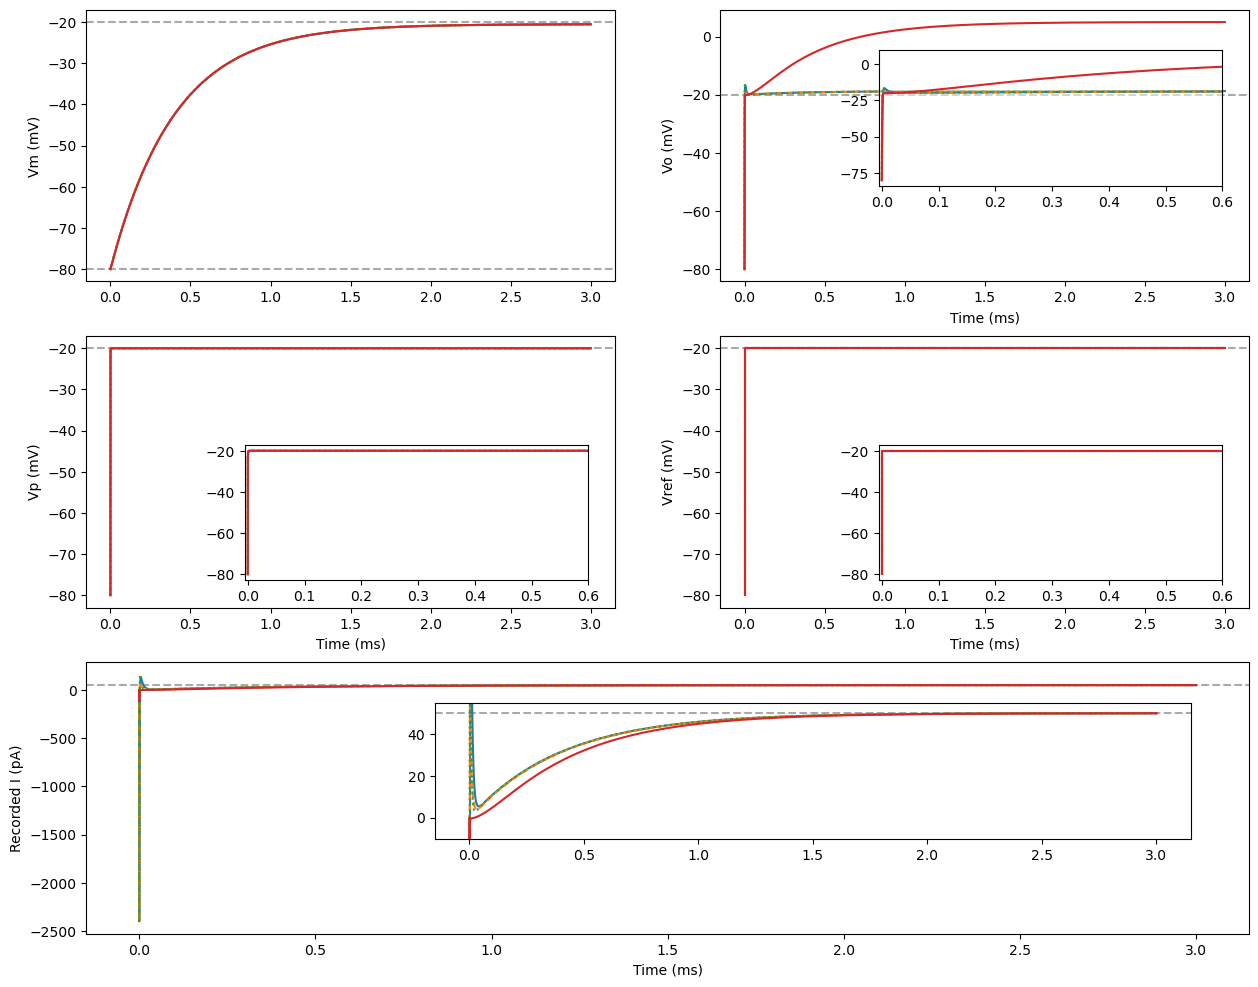

In [4]:
sA = myokit.Simulation(mA)
sA.set_constant('amp.alpha', 0)
sA.set_constant('amp.beta', 0)
sA.set_constant('amp.tau_sum', 1e-9)
dA = sA.run(t1)
ax = plot(mA, dA, altins=True)

sA.reset()
sA.set_constant('amp.tau_amp', 16e-6)
dA = sA.run(t1)
ax = plot(mA, dA, axes=ax, ls='--', altins=True)

sA.reset()
sA.set_constant('amp.Cf', 0.16)
dA = sA.run(t1)
ax = plot(mA, dA, axes=ax, ls=':', altins=True)

sA.reset()
sA.set_constant('amp.Rf', 0.5)
dA = sA.run(t1)
ax = plot(mA, dA, axes=ax, altins=True)

plt.show()

Now we switch compensation on and run again

0.5367242487486088
0.333262698252593
0.1516743675406289


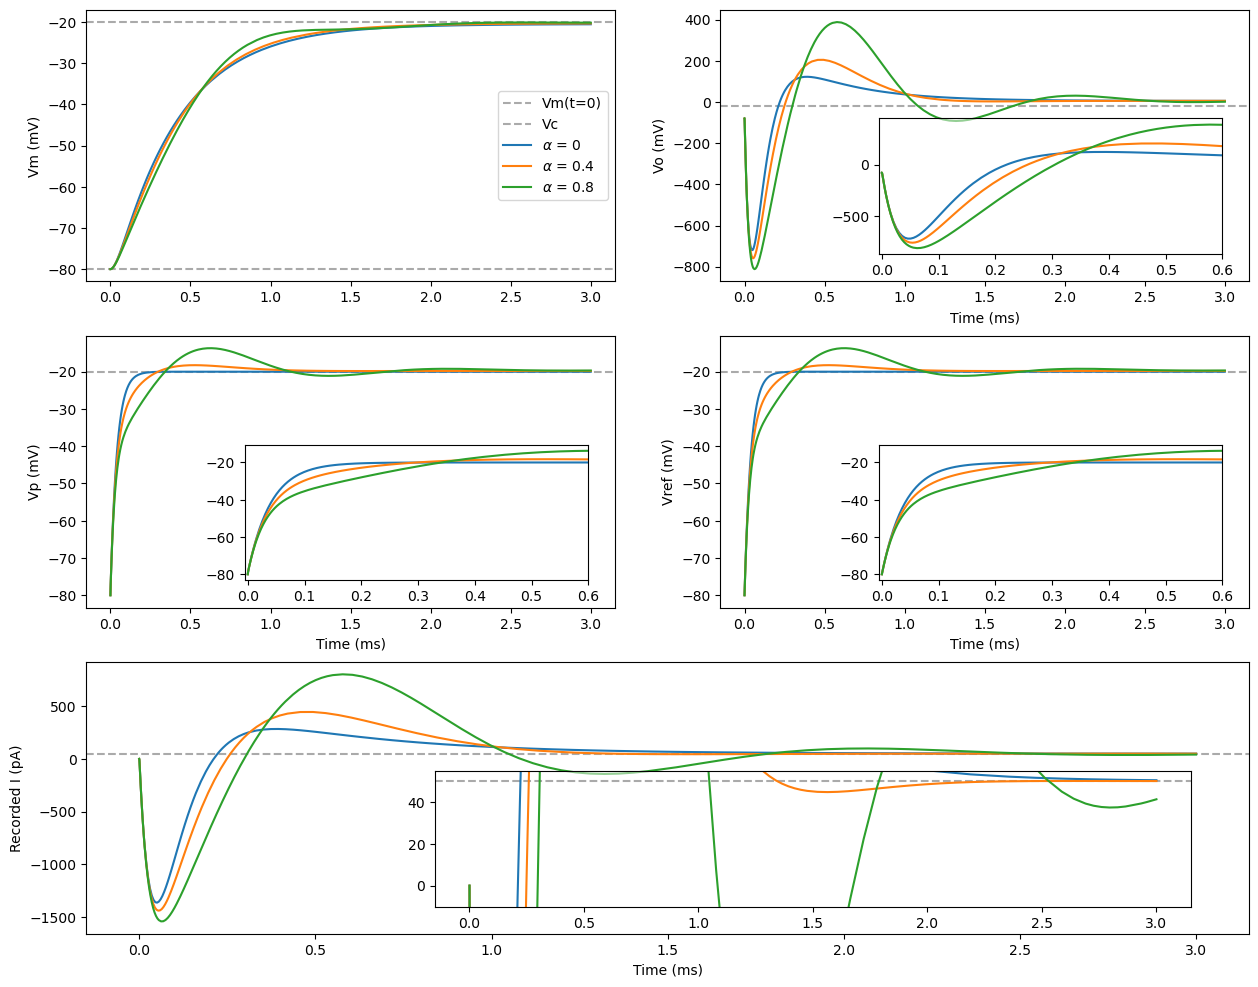

In [5]:
sA.reset()
sA.set_constant('amp.alpha', 0)
sA.set_constant('amp.beta', 0)
sA.set_constant('amp.tau_sum', 40e-3)

dA = sA.run(t1)
print(abs(-20 - dA['amp.Vm'][-1]))
ax = plot(mA, dA, label='$\\alpha$ = 0')

sA.reset()
sA.set_constant('amp.alpha', 0.4)
dA = sA.run(t1)
print(abs(-20 - dA['amp.Vm'][-1]))
ax = plot(mA, dA, axes=ax, label='$\\alpha$ = 0.4')

sA.reset()
sA.set_constant('amp.alpha', 0.8)
dA = sA.run(t1)
print(abs(-20 - dA['amp.Vm'][-1]))
ax = plot(mA, dA, axes=ax, label='$\\alpha$ = 0.8')
ax[0].legend()
plt.show()

0.5367242487486088
0.30016489497650056
0.18598502652134385


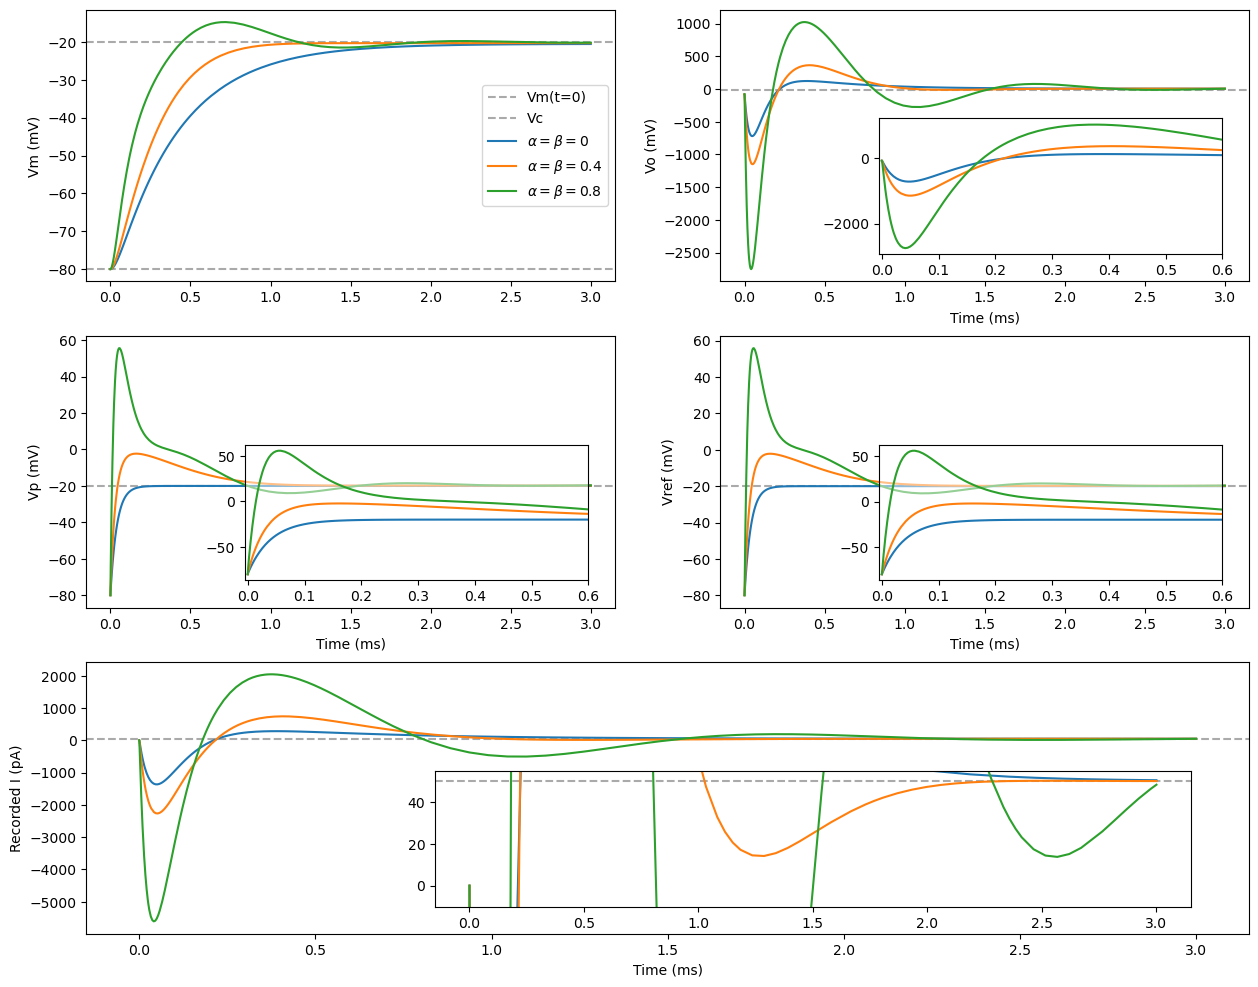

In [6]:
sA.reset()
sA.set_constant('amp.alpha', 0)
sA.set_constant('amp.beta', 0)

dA = sA.run(t1)
print(abs(-20 - dA['amp.Vm'][-1]))
ax = plot(mA, dA, label='$\\alpha = \\beta = 0$')

sA.reset()
sA.set_constant('amp.alpha', 0.4)
sA.set_constant('amp.beta', 0.4)
dA = sA.run(t1)
print(abs(-20 - dA['amp.Vm'][-1]))
ax = plot(mA, dA, axes=ax, label='$\\alpha = \\beta = 0.4$')

sA.reset()
sA.set_constant('amp.alpha', 0.8)
sA.set_constant('amp.beta', 0.8)
dA = sA.run(t1)
print(abs(-20 - dA['amp.Vm'][-1]))
ax = plot(mA, dA, axes=ax, label='$\\alpha = \\beta = 0.8$')
ax[0].legend()
plt.show()

## Lei-style model (1, 2b, 3b, 4, 5, 6b)

As with the uncompensated model, we can write the Sigworth and Lei-style models using very similar equations:

\begin{align}
2b. && C_f\dot{V}_o = \frac{V_p-V_o}{R_f} + \frac{V_p-V_m}{R_s} + \left(C_p+C_f\right)\dot{V}_p - C_m^* \dot{V}_\text{est} - C_p^* \dot{V}_\text{ref}
\end{align}

\begin{align}
3b. && \tau_c\dot{V}_p = V_\text{ref} - V_p
\end{align}

\begin{align}
6b. && R_f I_\text{obs} = V_o - V_p
\end{align}

In [7]:
mB = myokit.parse_model('''
[[model]]
desc: Compensated model (1, 2b, 3b, 4, 5, 6b)
amp.Vm = -80
amp.Vp = -80
amp.Vo = -80
amp.Vr = -80
amp.Ve = -80

[amp]
alpha = 0.7
beta = 0.7
time = 0 [ms] in [ms] bind time
I = 50 [pA] in [pA]
Vc = -20 [mV] in [mV]
Cm = 40 [pF] in [pF]
Cm_est = 40 [pF] in [pF]
Cp = 4.5 [pF] in [pF]
Cp_est = 4.5 [pF] in [pF]
Cf = 0.3 [pF] in [pF]
Rs = 0.01 [GOhm] in [GOhm]
Rs_est = 0.01 [GOhm] in [GOhm]
Rf = 0.025 [GOhm] in [GOhm]
tau_amp = 50e-6 [ms] in [ms]
tau_sum = 40e-3 [ms] in [ms]
tau_c = tau_amp * (Cf + Cp) / Cf in [ms]
dot(Vm) = (Vp - Vm) / (Rs * Cm) - I / Cm : Eq 1
    in [mV]
dot(Vo) = ((Vp - Vo) / Rf + (Vp - Vm) / Rs +
           (Cp + Cf) * dot(Vp) - Cm_est * dot(Ve) - Cp_est * dot(Vr)
          ) / Cf : Eq 2b
    in [mV]
dot(Vp) = (Vr - Vp) / tau_c : Eq 3b
    in [mV]
dot(Ve) = (Vc - Ve) / ((1 - beta) * Rs_est * Cm_est) : Eq 4
    in [mV]
dot(Vr) = (Vc + alpha * Rs_est * I_obs + beta * Rs_est * Cm_est * dot(Ve) - Vr) / tau_sum : Eq 5
    in [mV]
I_obs = (Vo - Vp) / Rf : Eq 6b
    in [pA]

''')
mB.check_units(myokit.UNIT_STRICT)
sB = myokit.Simulation(mB)

0.5366387565672426
0.3332382862819969
0.15218429536997746


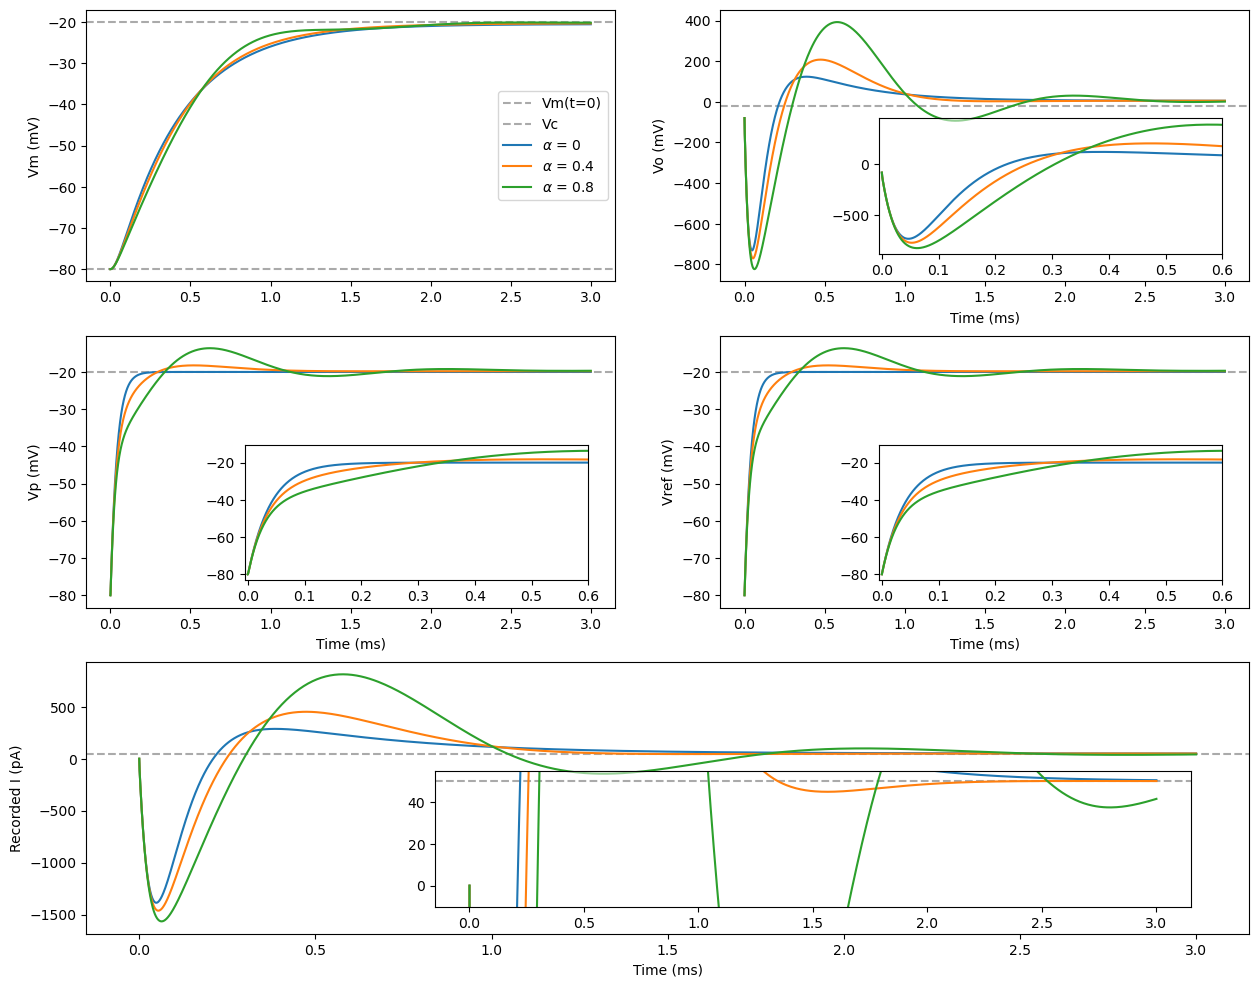

In [13]:
sB.reset()
sB.set_constant('amp.alpha', 0)
sB.set_constant('amp.beta', 0)
sB.set_constant('amp.tau_amp', 16e-6)
sB.set_constant('amp.Cf', 0.16)
sB.set_constant('amp.Rf', 0.5)
dB = sB.run(t1)
print(abs(-20 - dB['amp.Vm'][-1]))
ax = plot(mB, dB, label='$\\alpha$ = 0')

sB.reset()
sB.set_constant('amp.alpha', 0.4)
dB = sB.run(t1)
print(abs(-20 - dB['amp.Vm'][-1]))
ax = plot(mB, dB, axes=ax, label='$\\alpha$ = 0.4')

sB.reset()
sB.set_constant('amp.alpha', 0.8)
dB = sB.run(t1)
print(abs(-20 - dB['amp.Vm'][-1]))
ax = plot(mB, dB, axes=ax, label='$\\alpha$ = 0.8')

ax[0].legend()
plt.show()

0.5366387565672426
0.3001702877935628
0.18521350007465287


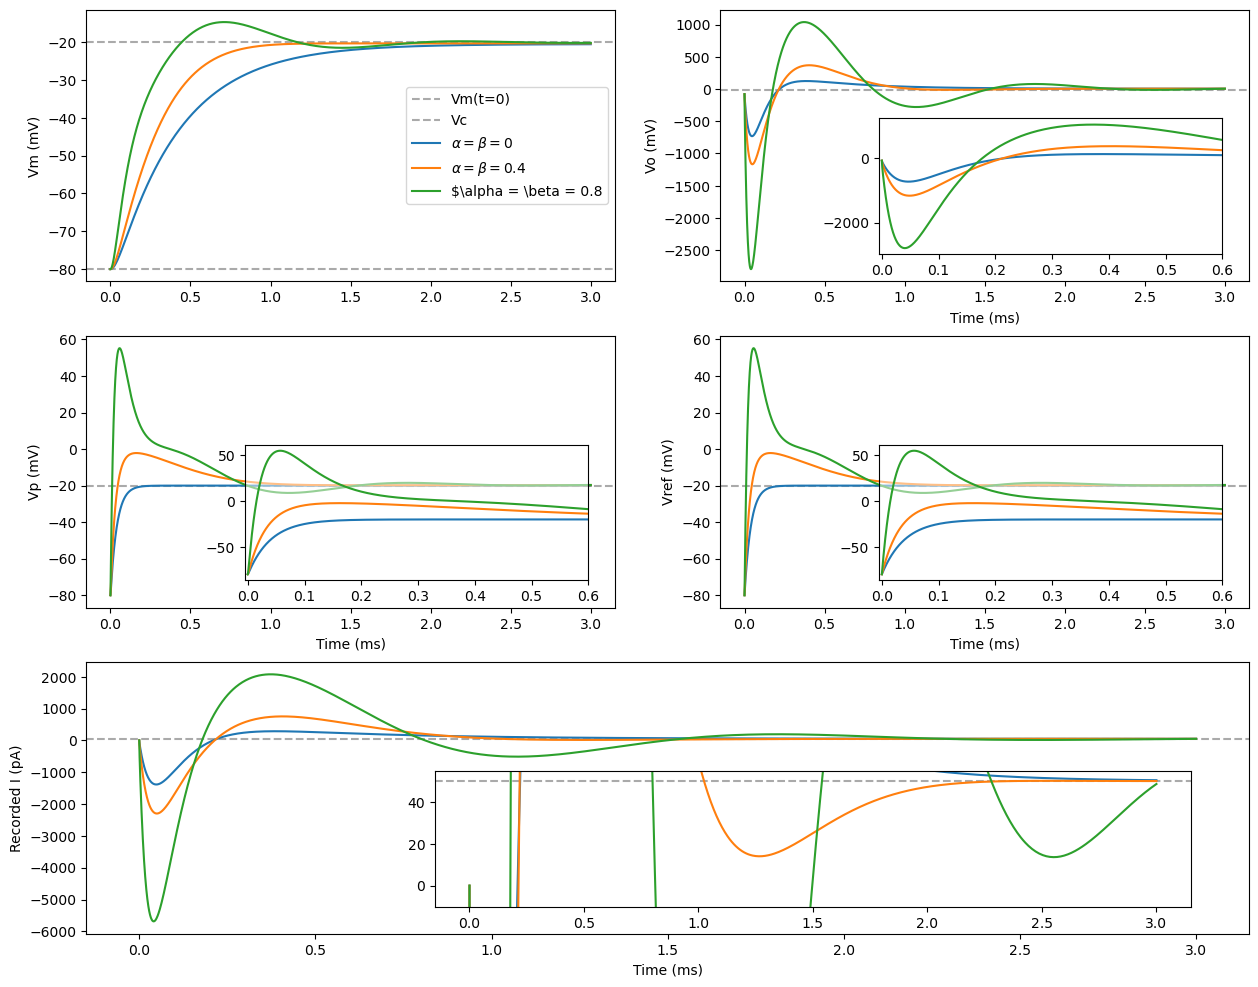

In [14]:
sB.reset()
sB.set_constant('amp.alpha', 0)
sB.set_constant('amp.beta', 0)
dB = sB.run(t1)
print(abs(-20 - dB['amp.Vm'][-1]))
ax = plot(mB, dB, label='$\\alpha = \\beta = 0$')

sB.reset()
sB.set_constant('amp.alpha', 0.4)
sB.set_constant('amp.beta', 0.4)
dB = sB.run(t1)
print(abs(-20 - dB['amp.Vm'][-1]))
ax = plot(mB, dB, axes=ax, label='$\\alpha = \\beta = 0.4$')

sB.reset()
sB.set_constant('amp.alpha', 0.8)
sB.set_constant('amp.beta', 0.8)
dB = sB.run(t1)
print(abs(-20 - dB['amp.Vm'][-1]))
ax = plot(mB, dB, axes=ax, label='$\\alpha = \\beta = 0.8')

ax[0].legend()
plt.show()